In [385]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [386]:
crop_reco=pd.read_csv("datasets/crop_recommendation_v2.csv")
crop_reco

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2095,7,11,22,22.695834,71.466622,6.542159,223.521132,tapioca
2096,8,13,28,18.890846,66.112498,6.950368,230.118555,tapioca
2097,5,11,29,25.214670,73.922861,7.489826,229.897810,tapioca
2098,5,19,23,22.733908,64.597150,5.814361,201.006787,tapioca


In [387]:
crop_prices=pd.read_csv("datasets/crop_prices.csv")
crop_prices.head()

,state,district,market,commodity,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,South Andaman,Port Blair,Amaranthus,Amaranthus,04/03/2019,6000,8000,7000
1,Andaman and Nicobar,South Andaman,Port Blair,Banana - Green,Banana - Green,04/03/2019,4500,5500,5000
2,Andaman and Nicobar,South Andaman,Port Blair,Bhindi(Ladies Finger),Bhindi,04/03/2019,6000,8000,7000
3,Andaman and Nicobar,South Andaman,Port Blair,Bitter gourd,Other,04/03/2019,6000,8000,7000
4,Andaman and Nicobar,South Andaman,Port Blair,Black pepper,Other,04/03/2019,110000,130000,120000


In [388]:
#dropping and renaming
crop_prices.drop(['market', 'variety', 'arrival_date', 'min_price', 'max_price'], axis=1, inplace=True)
crop_prices.rename(columns = {'modal_price':'price', 'commodity':'crop'}, inplace = True)
crop_prices.head()

,state,district,crop,price
0,Andaman and Nicobar,South Andaman,Amaranthus,7000
1,Andaman and Nicobar,South Andaman,Banana - Green,5000
2,Andaman and Nicobar,South Andaman,Bhindi(Ladies Finger),7000
3,Andaman and Nicobar,South Andaman,Bitter gourd,7000
4,Andaman and Nicobar,South Andaman,Black pepper,120000


In [389]:
district_rain=pd.read_csv("datasets/district_wise_rainfall.csv")
district_rain.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


In [390]:
#dropping and renaming
district_rain.drop(district_rain.iloc[:, 2:14], axis=1, inplace=True)
district_rain.rename(columns = {'STATE_UT_NAME':'state', 'DISTRICT':'district', 'ANNUAL':'annual'}, inplace = True)
district_rain['annual_avg']=district_rain['annual']/12
district_rain.head()

,state,district,annual,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,annual_avg
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,2805.2,165.2,540.7,1207.2,892.1,233.766667
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,3015.7,69.7,483.5,1757.2,705.3,251.308333
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,2913.3,48.6,405.6,1884.4,574.7,242.775000
3,ARUNACHAL PRADESH,LOHIT,3043.8,123.0,841.3,1848.5,231.0,253.650000
4,ARUNACHAL PRADESH,EAST SIANG,4034.7,112.8,645.4,3008.4,268.1,336.225000


In [391]:
#making all state and district names lowercase
district_rain['state'] = district_rain['state'].str.lower()
crop_prices['state'] = crop_prices['state'].str.lower()
district_rain['district'] = district_rain['district'].str.lower()
crop_prices['district'] = crop_prices['district'].str.lower()

In [392]:
#removing the states in rainfall dataset which dont exist in crop prices dataset
district_rain_temp = district_rain[district_rain['state'].isin(crop_prices['state'])]
x=list(district_rain_temp['state'].unique())

In [393]:
#finding out which states are named differently
s=set()
for i in crop_prices['state'].to_list():
    if i not in x:
        s.add(i)
print(s)

{'chattisgarh', 'telangana', 'uttrakhand', 'odisha', 'himachal pradesh', 'andaman and nicobar'}


In [394]:
#manually changing them
district_rain.replace({'uttaranchal':'uttrakhand', 'orissa':'odisha', 'chatisgarh':'chattisgarh', 'andaman and nicobar islands': 'andaman and nicobar', 'himachal':'himachal pradesh'}, 
                        regex=True, inplace=True)

In [395]:
#removing the states in rainfall dataset which dont exist in crop prices dataset again
district_rain = district_rain[district_rain['state'].isin(crop_prices['state'])]
x=list(district_rain['state'].unique())
print(len(x))

25


Special case - telangana

In [396]:
#districts in unsplit andhra pradesh 
both_districsts=list(district_rain[district_rain['state'] == 'andhra pradesh']['district'].unique())
print(both_districsts)

['east godavari', 'west godavari', 'guntur', 'krishna', 'nellore', 'prakasam', 'srikakulam', 'visakhapatnam', 'vizianagaram', 'adilabad', 'hyderabad', 'karimnagar', 'khammam', 'mahabubnagar', 'medak', 'nalgonda', 'nizamabad', 'warangal', 'rangareddy', 'anantapur', 'chittoor', 'kuddapah', 'kurnool']


In [397]:
#districts which come under telangana
telangana_districts=list(crop_prices[crop_prices['state']=='telangana']['district'].unique())
print(telangana_districts)

['hyderabad', 'karimnagar', 'khammam', 'nalgonda', 'nizamabad', 'ranga reddy']


In [398]:
#change andhra pradesh to telangana if district belongs to telangana
district_rain['state'] = np.where(district_rain['district'].isin(telangana_districts), 'telangana', district_rain['state'])
len(list(district_rain['state'].unique()))

26

In [399]:
crop_prices.groupby('state').apply(lambda x: len(x['district'].unique().tolist())).sort_index()

state
andaman and nicobar     1
andhra pradesh          3
assam                   6
chattisgarh             3
goa                     1
gujarat                 9
haryana                 6
himachal pradesh        2
jammu and kashmir       1
karnataka               3
kerala                  9
madhya pradesh          8
maharashtra            10
manipur                 5
meghalaya               1
nagaland                1
odisha                 10
pondicherry             1
punjab                 12
rajasthan               9
tamil nadu             18
telangana               6
tripura                 3
uttar pradesh          32
uttrakhand              2
west bengal            12
dtype: int64

In [400]:
district_rain_temp.groupby('state').apply(lambda x: len(x['district'].unique().tolist())).sort_index()

state
andhra pradesh       23
assam                27
goa                   2
gujarat              26
haryana              21
jammu and kashmir    22
karnataka            30
kerala               14
madhya pradesh       50
maharashtra          35
manipur               9
meghalaya             7
nagaland             11
pondicherry           4
punjab               20
rajasthan            33
tamil nadu           32
tripura               4
uttar pradesh        71
west bengal          19
dtype: int64

In [401]:
#seeing standard deviation of prices between districts of a state, to see if we can just take average for a state
print(crop_prices[crop_prices['state']=='manipur'].groupby('crop').std())
print(crop_prices[crop_prices['state']=='manipur'].groupby('crop').mean())

                                   price
crop                                    
Banana                        223.606798
Bengal Gram Dal (Chana Dal)  1501.110700
Cabbage                       250.998008
Cauliflower                   273.861279
Dry Chillies                  830.160627
Ginger(Green)                1140.175425
Masur Dal                     443.846820
Onion                         223.606798
Paddy(Dhan)(Common)           119.678388
Potato                        248.997992
Rice                          223.606798
Turmeric (raw)                       NaN
                                    price
crop                                     
Banana                        3400.000000
Bengal Gram Dal (Chana Dal)   9533.333333
Cabbage                       1260.000000
Cauliflower                   2200.000000
Dry Chillies                 14325.000000
Ginger(Green)                 4400.000000
Masur Dal                     7480.000000
Onion                         2400.000000
Paddy(

Exploring Crop types in datasets

In [402]:
crops_available=list(crop_reco['label'].unique())
print(crops_available)

['rice', 'maize', 'chickpea', 'kidneybeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee', 'wheat', 'tapioca']


In [403]:
crop_prices['crop'].unique()

array(['Amaranthus', 'Banana - Green', 'Bhindi(Ladies Finger)',
       'Bitter gourd', 'Black pepper', 'Bottle gourd', 'Brinjal',
       'Cabbage', 'Carrot', 'Cauliflower', 'Cluster beans', 'Coconut',
       'Colacasia', 'Onion', 'Potato', 'Tomato',
       'Bengal Gram(Gram)(Whole)', 'Jowar(Sorghum)',
       'Paddy(Dhan)(Common)', 'Lentil (Masur)(Whole)', 'Rice',
       'Cucumbar(Kheera)', 'Field Pea', 'French Beans (Frasbean)',
       'Green Chilli', 'Knool Khol', 'Pumpkin', 'Raddish',
       'Black Gram (Urd Beans)(Whole)', 'Green Gram (Moong)(Whole)',
       'Jute', 'Maida Atta', 'Mustard', 'Wheat Atta', 'Garlic',
       'Masur Dal', 'Ridgeguard(Tori)', 'Arecanut(Betelnut/Supari)',
       'Arhar (Tur/Red Gram)(Whole)', 'Maize', 'Dry Chillies',
       'Groundnut', 'Capsicum', 'Guar', 'Lemon',
       'Bajra(Pearl Millet/Cumbu)', 'Castor Seed', 'Coriander(Leaves)',
       'Cowpea(Veg)', 'Drumstick', 'Elephant Yam (Suran)',
       'Ginger(Green)', 'Indian Beans (Seam)', 'Methi(Leaves)',

In [404]:
#change the name of crop to one of crop reco ones via regex
for i in crops_available:
    crop_prices['crop'] = crop_prices['crop'].str.replace(i, i, regex=True)

In [405]:
len(crop_prices['crop'].unique())

156

In [406]:
#correlation between humidity and rainfall
crop_reco['humidity'].corr(crop_reco['rainfall'])
#not much

0.15604949802349657

In [407]:
#the %sd between variables for each crop - checking to see if it can be reduced to 1 row
for i in crops_available:
    print(crop_reco[crop_reco['label']==i].std()/crop_reco[crop_reco['label']=='rice'].mean()*100)
    print()

N              14.917989
P              16.614052
K               7.389433
temperature     8.574627
humidity        1.723997
ph             11.963201
rainfall       14.519292
dtype: float64

N              14.957429
P              16.835852
K               7.377728
temperature    11.310406
humidity        6.622720
ph              6.422584
rainfall        6.582804
dtype: float64

N              15.209225
P              15.759868
K               8.181343
temperature     4.938247
humidity        2.080856
ph             12.467986
rainfall        3.363669
dtype: float64

N              13.561479
P              15.912367
K               7.780825
temperature    10.973600
humidity        2.634313
ph              2.260063
rainfall       11.055661
dtype: float64

N              14.408112
P              16.541112
K               7.896584
temperature     3.552425
humidity        3.465733
ph              4.459975
rainfall        3.013456
dtype: float64

N              15.852119
P              15.02

/var/folders/9p/s20qcdt565j49qt2_m5b682m0000gn/T/ipykernel_84247/726139227.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(crop_reco[crop_reco['label']==i].std()/crop_reco[crop_reco['label']=='rice'].mean()*100)


In [408]:
crop_reco[crop_reco['label']=='coconut']['ph'].mean()

5.97656212619

(array([136., 275.,  64.,  30.,  25.,   3.,   0.,   0.,   2.,   1.]),
 array([  7.88333333,  67.33916667, 126.795     , 186.25083333,
        245.70666667, 305.1625    , 364.61833333, 424.07416667,
        483.53      , 542.98583333, 602.44166667]),
 <BarContainer object of 10 artists>)

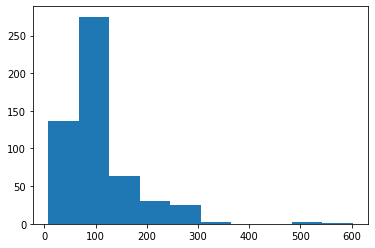

In [409]:
#comparing the two rainfalls to see if model can be created - it does
plt.hist(district_rain['annual_avg'])


(array([321., 457., 571., 218., 131., 147., 123.,  84.,  31.,  17.]),
 array([ 35.03484812,  61.38737506,  87.739902  , 114.09242893,
        140.44495587, 166.79748281, 193.15000975, 219.50253669,
        245.85506362, 272.20759056, 298.5601175 ]),
 <BarContainer object of 10 artists>)

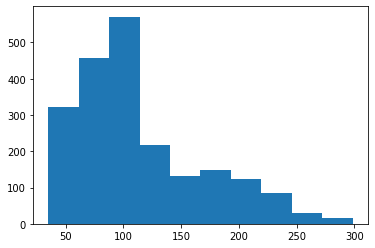

In [410]:
plt.hist(crop_reco['rainfall'])

In [411]:
print(*district_rain['state'].unique(), sep="\n")

andaman and nicobar
assam
meghalaya
manipur
nagaland
tripura
west bengal
odisha
uttar pradesh
uttrakhand
haryana
punjab
himachal pradesh
jammu and kashmir
rajasthan
madhya pradesh
gujarat
maharashtra
goa
chattisgarh
andhra pradesh
telangana
tamil nadu
pondicherry
karnataka
kerala


In [412]:
crop_prod=pd.read_csv('datasets/crop_production.csv')
crop_prod

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [413]:
crop_prod.groupby('State_Name').apply(lambda x: len(x['Crop'].unique().tolist())).sort_index()

State_Name
Andaman and Nicobar Islands    20
Andhra Pradesh                 69
Arunachal Pradesh              16
Assam                          39
Bihar                          42
Chandigarh                     12
Chhattisgarh                   46
Dadra and Nagar Haveli         21
Goa                            15
Gujarat                        32
Haryana                        42
Himachal Pradesh               36
Jammu and Kashmir              42
Jharkhand                      12
Karnataka                      59
Kerala                         49
Madhya Pradesh                 62
Maharashtra                    34
Manipur                        41
Meghalaya                      39
Mizoram                        24
Nagaland                       48
Odisha                         39
Puducherry                     31
Punjab                         22
Rajasthan                      51
Sikkim                         18
Tamil Nadu                     87
Telangana                      65
Tri

In [414]:
crops_available=list(crop_reco['label'].unique())
print(crops_available)

['rice', 'maize', 'chickpea', 'kidneybeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee', 'wheat', 'tapioca']


In [415]:
crop_prod['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Rapeseed &Mustard', 'Mesta',
       'Cowpea(Lobia)', 'Lemon', 'Pome Granet', 'Sapota', 'Cabbage',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Sannhamp',
       'Va

In [416]:
#remove things in brackets
crop_prod['Crop'] = crop_prod['Crop'].str.split('(').str.get(0)

#conver to lowercase and remove spaces
crop_prod['Crop'] = crop_prod['Crop'].str.lower().str.replace(" ", "")

crop_prod['Crop'].unique()


array(['arecanut', 'otherkharifpulses', 'rice', 'banana', 'cashewnut',
       'coconut', 'dryginger', 'sugarcane', 'sweetpotato', 'tapioca',
       'blackpepper', 'drychillies', 'otheroilseeds', 'turmeric', 'maize',
       'moong', 'urad', 'arhar/tur', 'groundnut', 'sunflower', 'bajra',
       'castorseed', 'cotton', 'horse-gram', 'jowar', 'korra', 'ragi',
       'tobacco', 'gram', 'wheat', 'masoor', 'sesamum', 'linseed',
       'safflower', 'onion', 'othermisc.pulses', 'samai', 'smallmillets',
       'coriander', 'potato', 'otherrabipulses', 'soyabean',
       'beans&mutter', 'bhindi', 'brinjal', 'citrusfruit', 'cucumber',
       'grapes', 'mango', 'orange', 'otherfibres', 'otherfreshfruits',
       'othervegetables', 'papaya', 'pomefruit', 'tomato',
       'rapeseed&mustard', 'mesta', 'cowpea', 'lemon', 'pomegranet',
       'sapota', 'cabbage', 'peas', 'nigerseed', 'bottlegourd',
       'sannhamp', 'varagu', 'garlic', 'ginger', 'oilseedstotal',
       'pulsestotal', 'jute', 'peas&bea

In [417]:
#replace things directly
crop_prod['Crop'] = crop_prod['Crop'].replace('rajmashkholar', 'kidneybeans')
crop_prod['Crop'] = crop_prod['Crop'].replace('pomegranet', 'pomegranate')
crop_prod['Crop'] = crop_prod['Crop'].replace('moong', 'mungbean')
crop_prod['Crop'] = crop_prod['Crop'].replace('gram', 'chickpea')

# crop_reco['Crop'] = crop_reco['Crop'].replace('moong', 'mungbean')

In [418]:
new_crops=crop_prod['Crop'].unique()
print(new_crops)

['arecanut' 'otherkharifpulses' 'rice' 'banana' 'cashewnut' 'coconut'
 'dryginger' 'sugarcane' 'sweetpotato' 'tapioca' 'blackpepper'
 'drychillies' 'otheroilseeds' 'turmeric' 'maize' 'mungbean' 'urad'
 'arhar/tur' 'groundnut' 'sunflower' 'bajra' 'castorseed' 'cotton'
 'horse-gram' 'jowar' 'korra' 'ragi' 'tobacco' 'chickpea' 'wheat' 'masoor'
 'sesamum' 'linseed' 'safflower' 'onion' 'othermisc.pulses' 'samai'
 'smallmillets' 'coriander' 'potato' 'otherrabipulses' 'soyabean'
 'beans&mutter' 'bhindi' 'brinjal' 'citrusfruit' 'cucumber' 'grapes'
 'mango' 'orange' 'otherfibres' 'otherfreshfruits' 'othervegetables'
 'papaya' 'pomefruit' 'tomato' 'rapeseed&mustard' 'mesta' 'cowpea' 'lemon'
 'pomegranate' 'sapota' 'cabbage' 'peas' 'nigerseed' 'bottlegourd'
 'sannhamp' 'varagu' 'garlic' 'ginger' 'oilseedstotal' 'pulsestotal'
 'jute' 'peas&beans' 'blackgram' 'paddy' 'pineapple' 'barley' 'khesari'
 'guarseed' 'moth' 'othercereals&millets' 'cond-spcsother' 'turnip'
 'carrot' 'redish' 'arcanut' 'atca

In [419]:
#find common crops between them
print(list(set(new_crops) & set(crops_available)))
print(len(list(set(new_crops) & set(crops_available))))
final_crops=list(set(new_crops) & set(crops_available))

['lentil', 'papaya', 'jute', 'banana', 'tapioca', 'chickpea', 'pomegranate', 'kidneybeans', 'blackgram', 'wheat', 'grapes', 'orange', 'cotton', 'coffee', 'mango', 'watermelon', 'apple', 'coconut', 'maize', 'mungbean', 'rice']
21


In [420]:
#find uncommon
print(list(set(new_crops) - set(crops_available)))
print()
print(list(set(crops_available) - set(new_crops)))

['sugarcane', 'lemon', 'dryginger', 'beans&mutter', 'litchi', 'cauliflower', 'samai', 'colocosia', 'smallmillets', 'pumpkin', 'bottlegourd', 'atcanut', 'jobster', 'onion', 'jackfruit', 'plums', 'pineapple', 'mesta', 'barley', 'horse-gram', 'otherdryfruit', 'paddy', 'bhindi', 'bittergourd', 'drychillies', 'potato', 'oilseedstotal', 'ashgourd', 'othervegetables', 'sapota', 'cucumber', 'pomefruit', 'bajra', 'othercitrusfruit', 'cashewnutraw', 'totalfoodgrain', 'arhar/tur', 'otheroilseeds', 'lab-lab', 'cashewnut', 'coriander', 'urad', 'sunflower', 'snakguard', 'pulsestotal', 'castorseed', 'otherrabipulses', 'otherfibres', 'otherfreshfruits', 'arecanut', 'perilla', 'bean', 'otherkharifpulses', 'pear', 'ber', 'citrusfruit', 'brinjal', 'nigerseed', 'garlic', 'redish', 'safflower', 'ricebean', 'tea', 'linseed', 'groundnut', 'sesamum', 'moth', 'rubber', 'peas&beans', 'beetroot', 'sannhamp', 'ginger', 'jute&mesta', 'soyabean', 'guarseed', 'cowpea', 'cardamom', 'cond-spcsother', 'ribedguard', 'pe

In [421]:
final_crops.sort()
pd.DataFrame(final_crops).to_csv("sample_list.csv", index=False)

In [422]:
crop_prod = crop_prod[crop_prod['Crop'].isin(final_crops)]
crop_prod


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,banana,176.0,641.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,coconut,18168.0,65100000.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,tapioca,40.0,169.0
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,rice,83.0,300.0
...,...,...,...,...,...,...,...
246078,West Bengal,PURULIA,2014,Rabi,mungbean,64.0,40.0
246084,West Bengal,PURULIA,2014,Rabi,wheat,1622.0,3663.0
246085,West Bengal,PURULIA,2014,Summer,maize,325.0,2039.0
246086,West Bengal,PURULIA,2014,Summer,rice,306.0,801.0


In [424]:
crop_prod['State_Name'] = crop_prod['State_Name'].replace('Andaman and Nicobar Islands', 'Andaman And Nicobar').str.strip()
crop_prod['State_Name'] = crop_prod['State_Name'].replace('Chhattisgarh', 'Chattisgarh')
crop_prod['State_Name'] = crop_prod['State_Name'].replace('Puducherry', 'Pondicherry')
crop_prod['State_Name'] = crop_prod['State_Name'].replace('Uttarakhand', 'Uttrakhand')
crop_prod['State_Name'] = crop_prod['State_Name'].replace('Jammu and Kashmir', 'Jammu And Kashmir')
print(crop_prod['State_Name'].unique())
print(len(crop_prod['State_Name'].unique()))

['Andaman And Nicobar' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam'
 'Bihar' 'Chandigarh' 'Chattisgarh' 'Dadra and Nagar Haveli' 'Goa'
 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu And Kashmir' 'Jharkhand'
 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur' 'Meghalaya'
 'Mizoram' 'Nagaland' 'Odisha' 'Pondicherry' 'Punjab' 'Rajasthan' 'Sikkim'
 'Tamil Nadu' 'Telangana' 'Tripura' 'Uttar Pradesh' 'Uttrakhand'
 'West Bengal']
33


/var/folders/9p/s20qcdt565j49qt2_m5b682m0000gn/T/ipykernel_84247/24741957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_prod['State_Name'] = crop_prod['State_Name'].replace('Andaman and Nicobar Islands', 'Andaman And Nicobar').str.strip()
/var/folders/9p/s20qcdt565j49qt2_m5b682m0000gn/T/ipykernel_84247/24741957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_prod['State_Name'] = crop_prod['State_Name'].replace('Chhattisgarh', 'Chattisgarh')
/var/folders/9p/s20qcdt565j49qt2_m5b682m0000gn/

In [425]:
district_rain['state'] = district_rain['state'].str.title()
print(district_rain['state'].unique())
print(len(district_rain['state'].unique()))

['Andaman And Nicobar' 'Assam' 'Meghalaya' 'Manipur' 'Nagaland' 'Tripura'
 'West Bengal' 'Odisha' 'Uttar Pradesh' 'Uttrakhand' 'Haryana' 'Punjab'
 'Himachal Pradesh' 'Jammu And Kashmir' 'Rajasthan' 'Madhya Pradesh'
 'Gujarat' 'Maharashtra' 'Goa' 'Chattisgarh' 'Andhra Pradesh' 'Telangana'
 'Tamil Nadu' 'Pondicherry' 'Karnataka' 'Kerala']
26


In [430]:
#only keeping the final states
crop_prod['District_Name'] = crop_prod['District_Name'].str.title()
crop_prod = crop_prod[crop_prod['State_Name'].isin(district_rain['state'])]
print(len(crop_prod['State_Name'].unique()))

26


/var/folders/9p/s20qcdt565j49qt2_m5b682m0000gn/T/ipykernel_84247/423413613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crop_prod['District_Name'] = crop_prod['District_Name'].str.title()


In [437]:
pd.DataFrame(crop_prod).to_csv("datasets/crop_production_v2.csv", index=False)

In [433]:
crop_prod['Season'] = crop_prod['Season'].str.strip()

In [434]:
crop_prod['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

In [443]:
crop_prod.groupby('State_Name').apply(lambda x: len(x['Season'].unique().tolist())).sort_index()

State_Name
Andaman And Nicobar    4
Andhra Pradesh         3
Assam                  6
Chattisgarh            4
Goa                    3
Gujarat                4
Haryana                3
Himachal Pradesh       3
Jammu And Kashmir      2
Karnataka              4
Kerala                 5
Madhya Pradesh         3
Maharashtra            5
Manipur                6
Meghalaya              6
Nagaland               2
Odisha                 5
Pondicherry            6
Punjab                 3
Rajasthan              3
Tamil Nadu             3
Telangana              3
Tripura                2
Uttar Pradesh          4
Uttrakhand             4
West Bengal            6
dtype: int64

In [438]:
hum_df=pd.read_csv('datasets/rel_humidity.csv')
hum_df

,state,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,jan-feb,mar-may,jun-sep,oct-dec
0,Andhra Pradesh,71.66,66.99,61.93,59.36,48.19,51.37,57.68,63.61,70.34,73.54,75.35,72.03,69.325,56.493333,60.7500,73.640000
1,Arunachal Pradesh,61.69,60.71,59.99,68.05,75.28,82.31,86.47,83.56,83.62,77.74,72.32,66.90,61.200,67.773333,83.9900,72.320000
2,Assam,68.54,61.35,53.39,64.35,73.24,81.81,85.78,82.78,83.77,80.33,77.13,74.02,64.945,63.660000,83.5350,77.160000
3,Bihar,55.99,49.43,30.01,26.53,33.30,44.65,65.77,68.83,71.26,64.98,48.13,46.00,52.710,29.946667,62.6275,53.036667
4,Chhattisgarh,44.19,35.13,25.57,21.56,22.26,47.46,71.65,79.15,77.38,68.06,52.45,46.48,39.660,23.130000,68.9100,55.663333
5,Goa,56.87,57.46,63.85,69.41,73.28,81.50,86.00,85.93,83.77,76.96,64.71,57.76,57.165,68.846667,84.3000,66.476667
6,Gujarat,34.99,31.82,31.23,35.92,45.62,57.42,73.07,77.75,72.85,43.40,33.86,32.88,33.405,37.590000,70.2725,36.713333
7,Haryana,49.70,49.01,37.65,21.55,17.36,27.04,47.95,57.36,51.65,31.86,29.26,35.04,49.355,25.520000,46.0000,32.053333
8,Himachal Pradesh,46.80,51.56,45.36,40.30,36.10,47.20,77.58,86.18,76.10,52.54,43.15,39.85,49.180,40.586667,71.7650,45.180000
9,Jammu and Kashmir,39.24,46.58,41.17,30.99,23.68,27.26,46.99,60.12,50.48,31.74,26.99,29.42,42.910,31.946667,46.2125,29.383333


In [449]:
a=list(hum_df['state'].unique())
a.sort()
b=list(district_rain['state'].unique())
b.sort()
print(a)
print()
print(b)
print(len(a))
print(len(b))

['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

['Andaman And Nicobar', 'Andhra Pradesh', 'Assam', 'Chattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Nagaland', 'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttrakhand', 'West Bengal']
29
26


In [450]:
for i in b:
    if i not in a:
        print(i)

Andaman And Nicobar
Chattisgarh
Jammu And Kashmir
Pondicherry
Uttrakhand


In [456]:
#Nan values
district_rain.isna().sum()

state         0
district      0
annual        0
Jan-Feb       0
Mar-May       0
Jun-Sep       0
Oct-Dec       0
annual_avg    0
dtype: int64

In [452]:
district_rain.to_csv('datasets/statewise_seasonwise_rainfall.csv', index=False)

(array([402., 332., 403.,  93., 193., 199., 185., 164.,  98.,  31.]),
 array([  0.,  14.,  28.,  42.,  56.,  70.,  84.,  98., 112., 126., 140.]),
 <BarContainer object of 10 artists>)

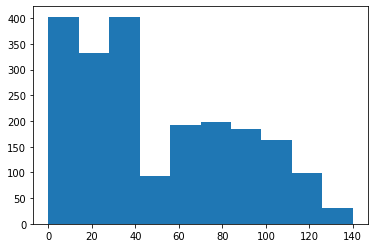

In [457]:
plt.hist(crop_reco['N'])

(array([336., 297., 351., 451., 291., 150.,  24.,   0.,  74., 126.]),
 array([  5.,  19.,  33.,  47.,  61.,  75.,  89., 103., 117., 131., 145.]),
 <BarContainer object of 10 artists>)

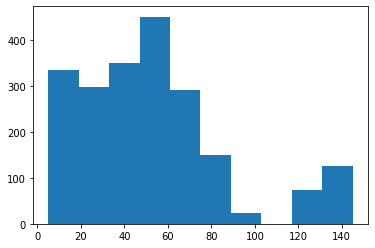

In [458]:
plt.hist(crop_reco['P'])

(array([714., 688., 398.,  88.,  12.,   0.,   0.,   0.,   0., 200.]),
 array([  5.,  25.,  45.,  65.,  85., 105., 125., 145., 165., 185., 205.]),
 <BarContainer object of 10 artists>)

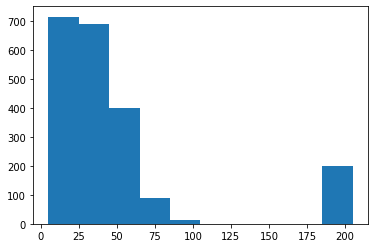

In [459]:
plt.hist(crop_reco['K'])

In [470]:
l=['maize', 'wheat', 'rice', 'mango']
for i in l:
    print(crop_reco[crop_reco['label'] == i]['N'].mean())
print()
for i in l:
    print(crop_reco[crop_reco['label'] == i]['P'].mean())
print()
for i in l:
    print(crop_reco[crop_reco['label'] == i]['K'].mean())

77.76
69.78
79.89
20.07

48.44
49.62
47.58
27.18

19.79
49.06
39.87
29.92


In [ ]:
['wheat', 'rice', 'maize', 'cotton']